In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [ ]:
ticker_symbols = ["TTF=F"]

# Downloading the data from Yahoo Finance
data = yf.download(ticker_symbols, start="2010-03-15", end="2024-04-05")

# We only need closing prices of the selected natural gas
TTF = data["Adj Close"]
TTF.columns = ['TFF']
TTF

[*********************100%%**********************]  1 of 1 completed


Date
2017-10-23    18.090000
2017-10-24    17.959999
2017-10-25    18.110001
2017-10-26    18.070000
2017-10-27    18.150000
                ...    
2024-03-27    27.687000
2024-03-28    27.340000
2024-04-02    26.202999
2024-04-03    25.563000
2024-04-04    26.205999
Name: Adj Close, Length: 1622, dtype: float64

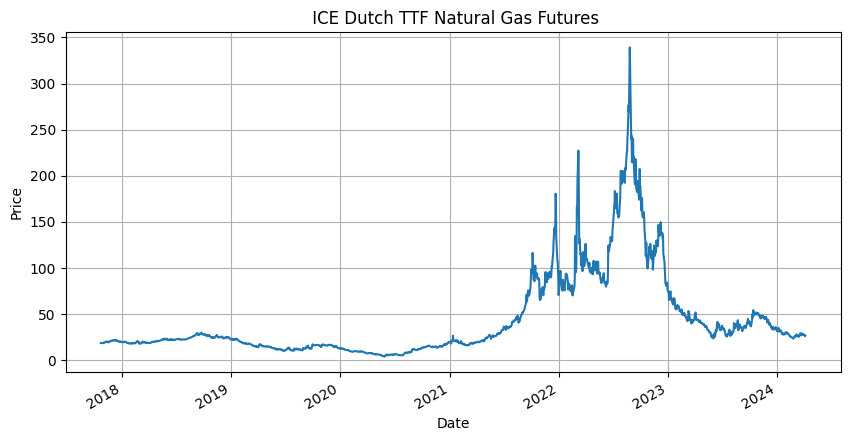

In [ ]:

# Graphical representation of the data
plt.figure(figsize=(10, 5))
data.plot()
plt.title(' ICE Dutch TTF Natural Gas Futures')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


In [ ]:
TTF_returns = yf.download("TTF=F", start="2010-03-15", end="2024-04-05").round(1)[['Adj Close']].pct_change().dropna()

TTF_returns.columns=['TTF RETURN']
TTF_returns

[*********************100%%**********************]  1 of 1 completed


,TTF RETURN
Date,
2017-10-24,-0.005525
2017-10-25,0.005556
2017-10-26,0.000000
2017-10-27,0.000000
2017-10-30,0.000000
...,...
2024-03-27,0.022140
2024-03-28,-0.014440
2024-04-02,-0.040293


<Figure size 1000x500 with 0 Axes>

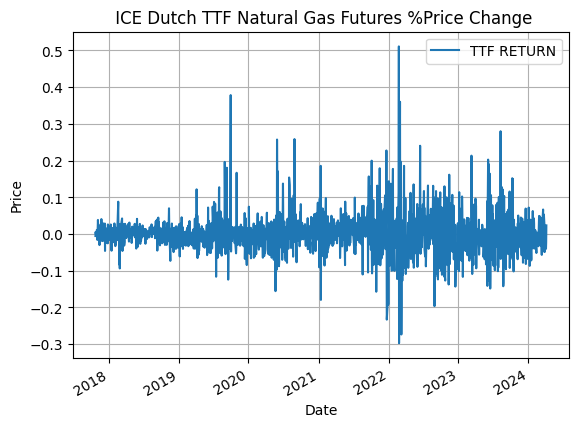

In [ ]:
plt.figure(figsize=(10, 5))
TTF_returns.plot()
plt.title(' ICE Dutch TTF Natural Gas Futures %Price Change')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

Backtsting of the selected stock  to analyze the embryonic recital of the given natural gas futures in the past which can guide its future deportment in the market.

In [ ]:
pip install backtesting


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=58dcfc0fbfb798774c22ba49251cac84a381a460f9dd0866949c8b3f10313d40
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.

/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4079    0  4079    0     0   6293      0 --:--:-- --:--:-- --:--:--  6294
100  517k  100  517k    0     0   373k      0  0:00:01  0:00:01 --:--:-- 2430k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4115    0  4115    0     0  10042      0 --:--:-- --:--:-- --:--:-- 10061
100  392k  100  392k    0     0   364k      0  0:00:01  0:00:01 --:--:--  824k


In [ ]:
import talib
import pandas_datareader.data as web
import datetime as dt

In [ ]:
data = yf.download("TTF=F", start="2010-03-15", end="2024-04-05")

# Create the strategy
class MyMACDStrategy(Strategy):
    def init(self):
        price = self.data.Close
        self.macd = self.I(lambda x: talib.MACD(x)[0], price)
        self.macd_signal = self.I(lambda x: talib.MACD(x)[1], price)

    def next(self):
        if crossover(self.macd, self.macd_signal):
            self.buy()
        elif crossover(self.macd_signal, self.macd):
            self.sell()

backtest = Backtest(data, MyMACDStrategy, commission=.002, exclusive_orders=True)
stats = backtest.run()

stats

[*********************100%%**********************]  1 of 1 completed


Start                     2017-10-23 00:00:00
End                       2024-04-04 00:00:00
Duration                   2355 days 00:00:00
Exposure Time [%]                   97.718866
Equity Final [$]                  3188.806289
Equity Peak [$]                  13450.240125
Return [%]                         -68.111937
Buy & Hold Return [%]               44.864561
Return (Ann.) [%]                  -16.269862
Volatility (Ann.) [%]               81.003565
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -88.277824
Avg. Drawdown [%]                  -11.762181
Max. Drawdown Duration     2232 days 00:00:00
Avg. Drawdown Duration      254 days 00:00:00
# Trades                                  117
Win Rate [%]                        35.897436
Best Trade [%]                      77.311072
Worst Trade [%]                    -37.711042
Avg. Trade [%]                    

In [ ]:
backtest.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1397', ...)